# Volatility decay in Leveraged ETFs
Leveraged ETFs are financial instruments designed to amplify the daily returns of a benchmark index, typically by a factor of 2x or 3x. For instance, if a leveraged ETF is structured to deliver twice the return of the S&P 500, then on a day when the S&P 500 rises by 1%, the ETF would increase by 2%.

However, there's a common misconception that leveraged ETFs are unsuitable for long-term buy-and-hold strategies. This article aims to challenge that notion and demonstrate that these claims are unfounded.

The explanation popularly given for this misconception volatility supposedly erodes long-term returns in leveraged ETFs. If this were true then non-leveraged funds would also not be suitable for buy and hold because they too suffer from volatility.


## Origins of the myth
The belief that daily volatility harms the returns of leveraged ETFs—and even unleveraged ETFs—has a mathematical basis. The reasoning goes like this: if the market decreases by a certain percentage $x$ one day and then increases by the same percentage $x$ the next day, the net return over those two days is:

$(1 - x)(1 + x) = 1 - x^2$

As $x^2$ is positive but the sign in front is negative, your position will always suffer a loss of $x^2$. For example, if the market goes down 5% one day, then up by 5%. The net result is:

$(1-0.05)(1+0.05)= 0.9975$

This results in a loss of 0.0025, or 0.25%. Thus, when the market is volatile, there is a small but consistent erosion of value—this is referred to as volatility decay. So whenever the market has volatility we lose money.

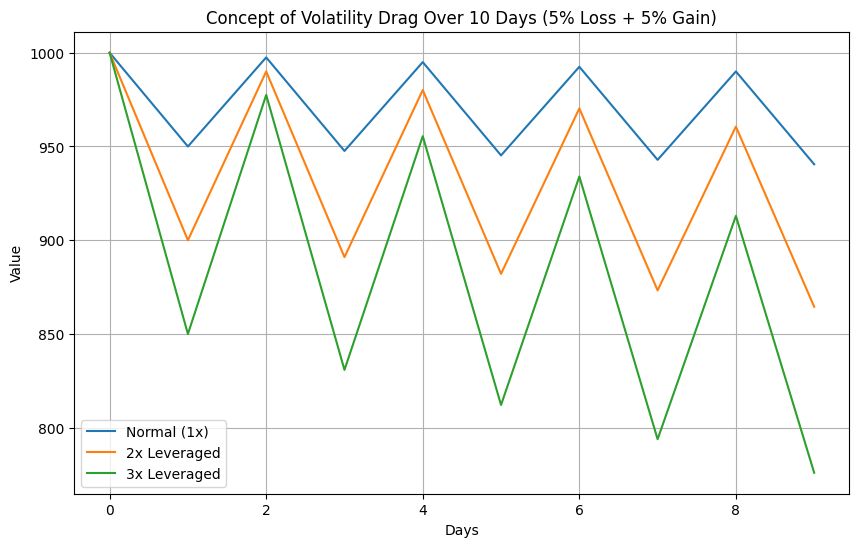

In [1]:
import matplotlib.pyplot as plt
days = list(range(10))  # Use 10 days
normal_etf = [1000, 950, 997.50, 947.62, 995.00, 945.25, 992.51, 942.88, 990.02, 940.52]
leveraged_2x = [1000, 900, 990, 891, 980.10, 882.09, 970.30, 873.27, 960.60, 864.54]
leveraged_3x = [1000, 850, 977.50, 830.87, 955.50, 812.17, 934.00, 793.90, 912.99, 776.04]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(days, normal_etf, label='Normal (1x)')
plt.plot(days, leveraged_2x, label='2x Leveraged')
plt.plot(days, leveraged_3x, label='3x Leveraged')

# Add labels and a legend
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('Concept of Volatility Drag Over 10 Days (5% Loss + 5% Gain)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

The graph above illustrates how increasing leverage amplifies the value of $x$, and consequently $x^2$, leading to greater volatility decay. It's important to note that even an ETF with no leverage (1x) experiences volatility decay.

The myth that leveraged ETFs will inevitably decline to zero over time stems from the belief that volatility decay will erode their value completely. Conventional wisdom often suggests that using no leverage, which corresponds to a 1x multiple, strikes the optimal balance between minimizing volatility decay and capturing market returns. However, there's nothing inherently special or "optimal" about a 1x multiple. Under historical market conditions, the "optimal" leverage could be 0.8x, 1.2x, 1.5x, or another value entirely—it's unlikely to be exactly 1x.

In reality, over the past decade, a "buy and hold" strategy using 2x or 3x leveraged ETFs has significantly outperformed a 1x "buy and hold" strategy of the underlying index. The graph below demonstrates this by comparing the performance of SPY (1x), SSO (2x), and UPRO (3x) from 2013 to 2023:


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


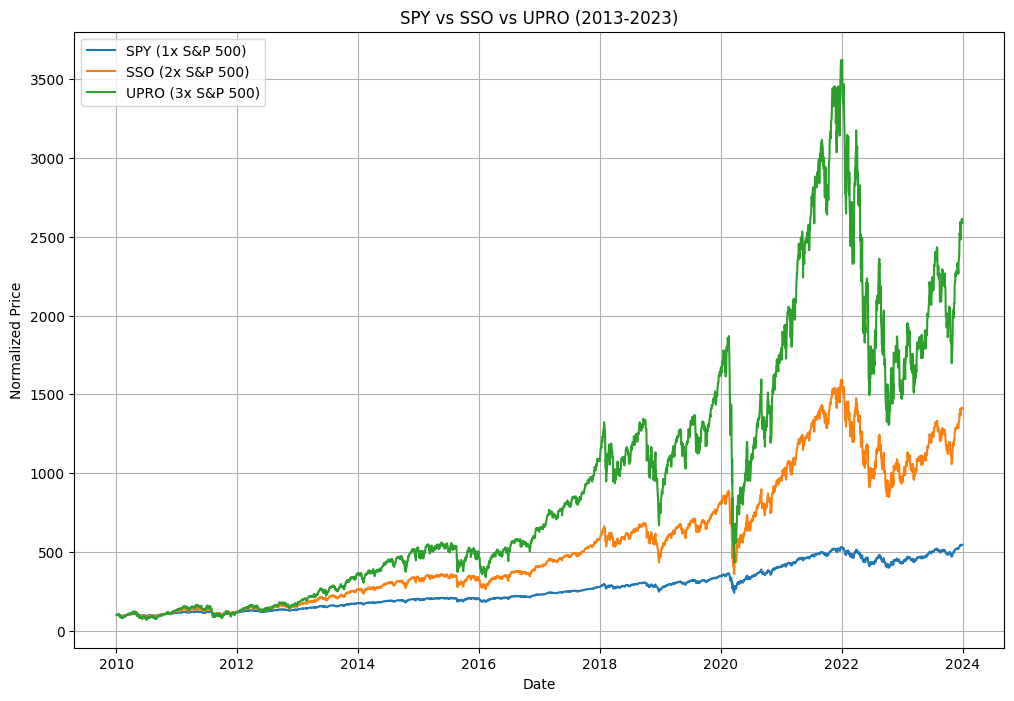

In [25]:
import yfinance as yf

# Download historical data for SPY (1x S&P 500), SSO (2x S&P 500), and UPRO (3x S&P 500)
start_date = '2010-01-01'
end_date = '2024-01-01'
spy = yf.download('SPY', start=start_date, end=end_date)
sso = yf.download('SSO', start=start_date, end=end_date)
upro = yf.download('UPRO', start=start_date, end=end_date)

# Normalize the data to start at the same point
spy['Normalized'] = spy['Adj Close'] / spy['Adj Close'].iloc[0] * 100
sso['Normalized'] = sso['Adj Close'] / sso['Adj Close'].iloc[0] * 100
upro['Normalized'] = upro['Adj Close'] / upro['Adj Close'].iloc[0] * 100

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(spy['Normalized'], label='SPY (1x S&P 500)')
plt.plot(sso['Normalized'], label='SSO (2x S&P 500)')
plt.plot(upro['Normalized'], label='UPRO (3x S&P 500)')
plt.title('SPY vs SSO vs UPRO (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


Of course, the past decade has seen an almost uninterrupted bull run except for the brief market crash in 2020 from COVID. There’s no question that when the markets go up rapidly, leverage amplifies the gains. The argument against leveraged ETFs always boils down to underperformance when the markets are volatile. 



## Case Study: The impact of 2022

As demonstrated in the previous section, leveraged ETFs have the potential to significantly outperform their 1x counterparts during prolonged bull markets. The "buy and hold" strategy with 2x or 3x leveraged ETFs can yield impressive returns, as shown by the data from 2010 to 2023.

However, it's essential to acknowledge that the same leverage that boosts returns in a rising market can also magnify losses in a downturn. The year 2022 offers a stark example of this risk.

Let's examine the specifics of what happened in 2022. The S&P 500 faced a significant downturn, which, when combined with the effects of leverage, led to severe drawdowns for investors in 2x and 3x leveraged ETFs.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


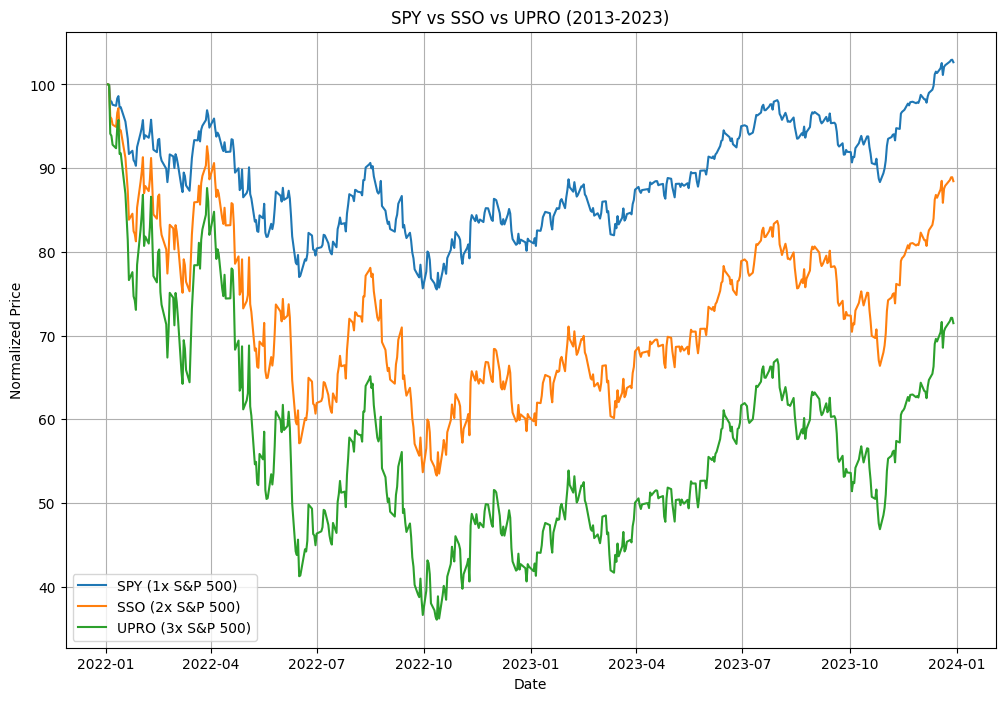

In [27]:
import yfinance as yf

# Download historical data for SPY (1x S&P 500), SSO (2x S&P 500), and UPRO (3x S&P 500)
start_date = '2022-01-01'
end_date = '2024-01-01'
spy = yf.download('SPY', start=start_date, end=end_date)
sso = yf.download('SSO', start=start_date, end=end_date)
upro = yf.download('UPRO', start=start_date, end=end_date)

# Normalize the data to start at the same point
spy['Normalized'] = spy['Adj Close'] / spy['Adj Close'].iloc[0] * 100
sso['Normalized'] = sso['Adj Close'] / sso['Adj Close'].iloc[0] * 100
upro['Normalized'] = upro['Adj Close'] / upro['Adj Close'].iloc[0] * 100

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(spy['Normalized'], label='SPY (1x S&P 500)')
plt.plot(sso['Normalized'], label='SSO (2x S&P 500)')
plt.plot(upro['Normalized'], label='UPRO (3x S&P 500)')
plt.title('SPY vs SSO vs UPRO (2013-2023)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()


The graph above illustrates that the recovery process for leveraged ETFs during the period from 2022 to 2024 has been slower compared to unleveraged investments.

For instance, if an investor began a "buy and hold" strategy at the start of 2022 with a 2x or 3x leveraged ETF, the sharp market decline in 2022 would have led to significant losses. Even as the market started to recover, the compounded effects of volatility and leverage could mean that, by 2024, such an investor might still not have fully recovered their initial investment.

However, it's important to note that this is a cherry-picked scenario—similar to the 2000 dot-com crash and the 2008 financial crisis—where a "buy and hold" strategy with leveraged ETFs would have been particularly poorly timed.

I’m not suggesting that the buy-and-hold strategy requires perfect timing to achieve significant returns, but having an exit strategy in place during market declines could be beneficial if you choose this approach. A simple strategy could be using a 200-day Simple Moving Average (SMA) as a trigger, where you exit the position if the daily close price falls below the SMA.


##  SPX Simulation
We will simulate a year of the SPX index by analyzing the probability and frequency of positive and negative days, using SPX data from 1927 to 2023. This analysis will help us understand how often each type of day occurs and the likelihood of their occurrence.

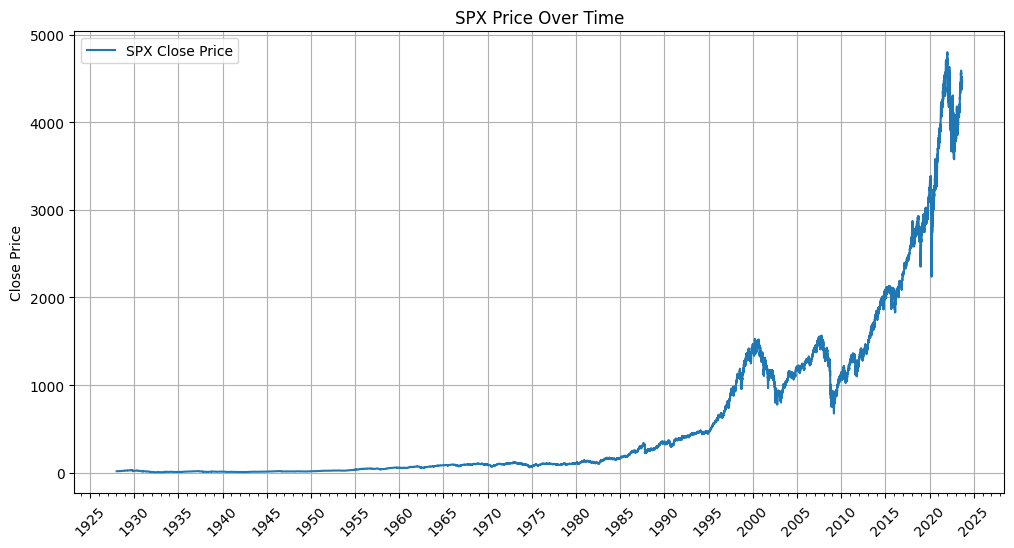

In [15]:
# Imports
import pandas as pd
import matplotlib.dates as mdates
import datetime
import numpy as np
import seaborn as sns

file_path = "data\^SPX.csv"
df = pd.read_csv(file_path)


# Convert the 'Date' column to a datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='SPX Close Price')

# Use date formatting for the x-axis ticks (only showing the year)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))

# Set minor ticks to display years as well (every year)
plt.gca().xaxis.set_minor_locator(mdates.YearLocator())

plt.ylabel('Close Price')
plt.title('SPX Price Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

The graph above presents the SPX closing prices from 1927 to 2023. This dataset forms the foundation of our analysis and simulations.


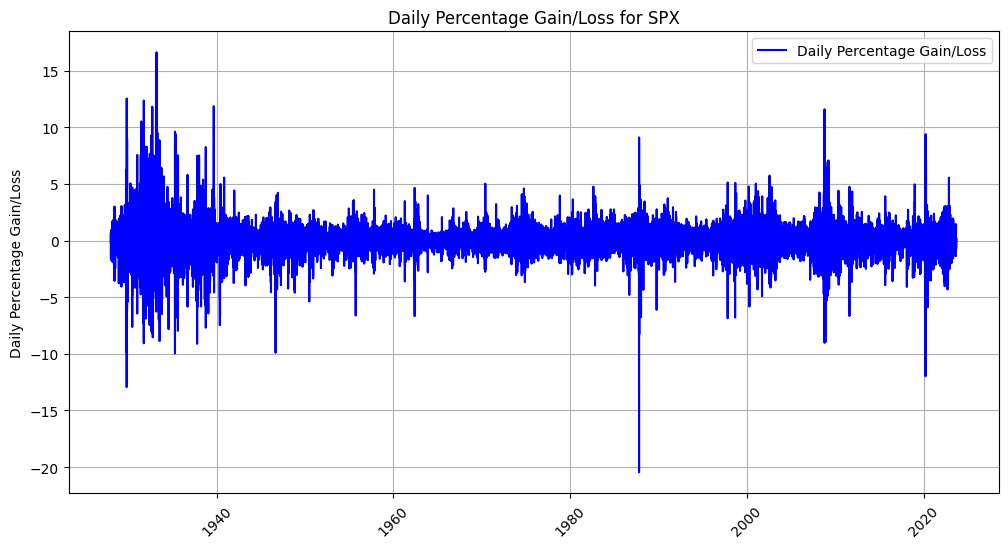

In [16]:
# Convert the 'Date' column to a datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily percentage gain or loss
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Calculate the average daily percentage gain/loss
average_daily_pct_change = df['Daily_Pct_Change'].mean()

# Create a plot for daily percentage gain or loss
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily_Pct_Change'], label='Daily Percentage Gain/Loss', color='b')

plt.ylabel('Daily Percentage Gain/Loss')
plt.title('Daily Percentage Gain/Loss for SPX')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

This graph displays the daily percentage gains or losses over time. From this, we observe that the majority of daily changes fall within a 5% gain or loss range, suggesting that the SPX generally experiences low volatility on a day-to-day basis. Lets explore further to confirm this is true. 

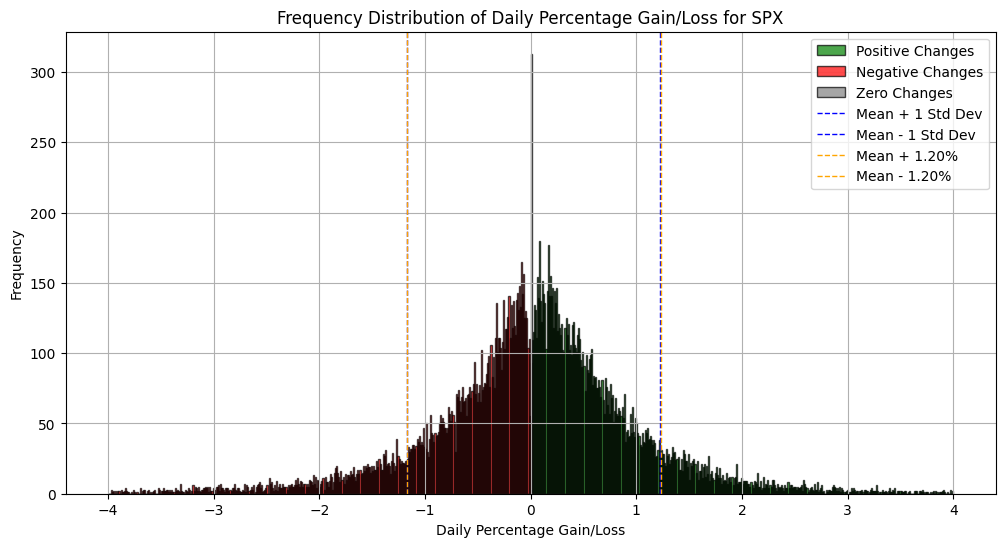

Standard Deviation of Daily Percentage Changes: 1.20%
Percentage of daily percentage changes within the range of ±1.20%: 68.35%


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Convert the 'Date' column to a datetime format if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the daily percentage gain or loss
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Calculate the standard deviation of daily percentage changes
std_dev = df['Daily_Pct_Change'].std()
mean_change = df['Daily_Pct_Change'].mean()

# Define the range for ±1.20%
lower_bound = mean_change - 1.20
upper_bound = mean_change + 1.20

# Calculate the CDF values for the bounds
cdf_lower = stats.norm.cdf(lower_bound, loc=mean_change, scale=std_dev)
cdf_upper = stats.norm.cdf(upper_bound, loc=mean_change, scale=std_dev)

# Calculate the proportion of data within the range
proportion_within_range = cdf_upper - cdf_lower

# Convert proportion to percentage
percentage_within_range = proportion_within_range * 100

# Create a plot for the frequency distribution of daily percentage gain or loss
plt.figure(figsize=(12, 6))

# Define bin edges
bin_edges = [-4 + i * 0.01 for i in range(801)]  # 0.01 percentage point intervals from -4% to 4%

# Filter data for positive, negative, and zero changes
positive_changes = df[df['Daily_Pct_Change'] > 0]['Daily_Pct_Change']
negative_changes = df[df['Daily_Pct_Change'] < 0]['Daily_Pct_Change']
zero_changes = df[df['Daily_Pct_Change'] == 0]['Daily_Pct_Change']

# Create histograms for each category with respective colors
plt.hist(positive_changes, bins=bin_edges, edgecolor='k', color='green', alpha=0.7, label='Positive Changes')
plt.hist(negative_changes, bins=bin_edges, edgecolor='k', color='red', alpha=0.7, label='Negative Changes')
plt.hist(zero_changes, bins=bin_edges, edgecolor='k', color='gray', alpha=0.7, label='Zero Changes')

# Add vertical lines for the standard deviation
plt.axvline(mean_change + std_dev, color='blue', linestyle='dashed', linewidth=1, label='Mean + 1 Std Dev')
plt.axvline(mean_change - std_dev, color='blue', linestyle='dashed', linewidth=1, label='Mean - 1 Std Dev')
plt.axvline(mean_change + 1.20, color='orange', linestyle='dashed', linewidth=1, label='Mean + 1.20%')
plt.axvline(mean_change - 1.20, color='orange', linestyle='dashed', linewidth=1, label='Mean - 1.20%')

plt.xlabel('Daily Percentage Gain/Loss')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Daily Percentage Gain/Loss for SPX')
plt.legend()
plt.grid(True)
plt.show()

# Print the standard deviation and percentage within range
print(f'Standard Deviation of Daily Percentage Changes: {std_dev:.2f}%')
print(f'Percentage of daily percentage changes within the range of ±1.20%: {percentage_within_range:.2f}%')


The frequency distribution of daily percentage changes, as shown in the graph above, resembles a a bell curve. This distribution reflects the relatively balanced nature of daily gains and losses in the market. 

Our analysis confirms that the SPX typically exhibits low volatility on a day-to-day basis, with a standard deviation of 1.20% in daily percentage changes. According to the properties of a normal distribution, this indicates that approximately 68% of daily percentage changes fall within the range of ±1.20% around the mean.

In [17]:
# Calculate the daily percentage change
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Count the number of positive, negative, and zero-change days
positive_days = len(df[df['Daily_Pct_Change'] > 0])
negative_days = len(df[df['Daily_Pct_Change'] < 0])
zero_change_days = len(df[df['Daily_Pct_Change'] == 0])
all_days = positive_days + negative_days + zero_change_days

# Calculate the percentage of positive and negative days
percentage_positive_days = (positive_days / all_days) * 100
percentage_negative_days = (negative_days / all_days) * 100

# Print the results to the console
print(f'Number of Positive Days: {positive_days}')
print(f'Number of Losing Days: {negative_days}')
print(f'Number of Zero-Change Days: {zero_change_days}')
print(f'Number of Overall Days: {all_days}')
print(f'Percentage of Positive Days: {percentage_positive_days:.2f}%')
print(f'Percentage of Losing Days: {percentage_negative_days:.2f}%')

Number of Positive Days: 12574
Number of Losing Days: 11143
Number of Zero-Change Days: 313
Number of Overall Days: 24030
Percentage of Positive Days: 52.33%
Percentage of Losing Days: 46.37%


These statistics indicate that the SPX has had more positive days than negative days over its history.

In [19]:
# Calculate the daily percentage gain or loss
df['Daily_Pct_Change'] = df['Close'].pct_change() * 100

# Filter data for positive and negative changes
positive_changes = df[df['Daily_Pct_Change'] > 0]['Daily_Pct_Change']
negative_changes = df[df['Daily_Pct_Change'] < 0]['Daily_Pct_Change']

# Calculate the average positive daily percentage
average_positive_pct = positive_changes.mean()

# Calculate the average negative daily percentage
average_negative_pct = negative_changes.mean()

print(f'Average Positive Daily Percentage: {average_positive_pct:.2f}%')
print(f'Average Negative Daily Percentage: {average_negative_pct:.2f}%')

Average Positive Daily Percentage: 0.76%
Average Negative Daily Percentage: -0.79%


Although the average negative daily percentage change is slightly larger in magnitude than the positive change, the overall frequency of positive days is higher. This imbalance plays a key role in long-term market behavior, as the cumulative effect of slightly more frequent positive days outweighs the impact of the larger negative days.

To further analyze this, we introduce an impact factor, which adjusts the probability of positive days and matches the mean impact of negative occurrences. This provides a balanced view of how gains and losses affect the market over time:

In [20]:
impact_factor = negative_days / positive_days
print(f'The impact_factor: {impact_factor}')

The impact_factor: 0.8861937331000477


In [23]:
True_negative_daily_impact = average_negative_pct * impact_factor
True_positive_daily_impact = average_positive_pct

print(f'Positive daily impact: {True_positive_daily_impact}')
print(f'Negative daily impact: {True_negative_daily_impact}')


Positive daily impact: 0.7600753471857
Negative daily impact: -0.7022110096379331


This adjustment helps simulate scenarios where a positive day follows a negative one, allowing us to better understand the real impact of volatility.


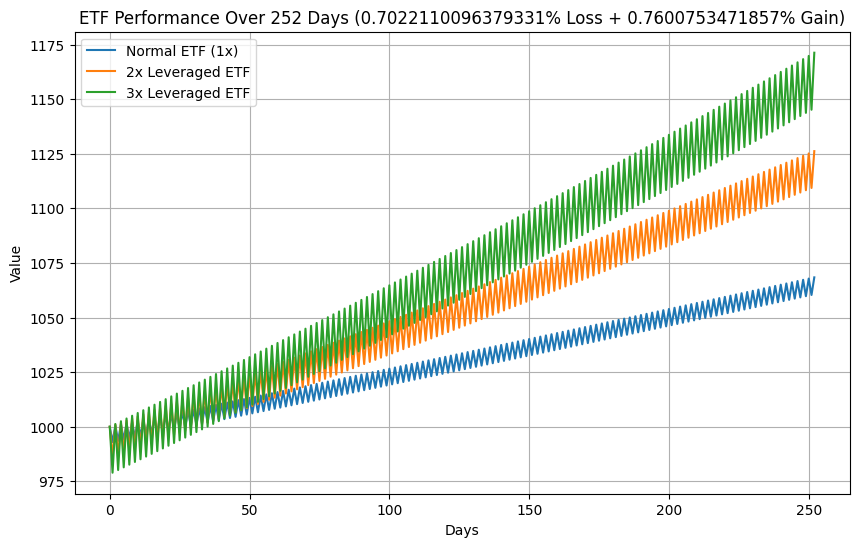

In [24]:
def calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=1):
    etf_values = [initial_value]

    for day in range(1, num_days + 1):
        # Determine whether it's a loss or gain day based on the day number
        is_loss_day = (day % 2 == 1)

        # Calculate the daily change based on whether it's a loss day or gain day and the previous day's closing value
        previous_closing_value = etf_values[-1]
        if is_loss_day:
            daily_change = -previous_closing_value * (loss_percentage / 100)
        else:
            daily_change = previous_closing_value * (gain_percentage / 100)

        # Apply leverage
        daily_change *= leverage

        # Update the ETF value for the day
        etf_value = previous_closing_value + daily_change

        # Append the new value to the list
        etf_values.append(etf_value)

    return etf_values

# Parameters
initial_value = 1000
loss_percentage = 0.7022110096379331
gain_percentage = 0.7600753471857
num_days = 252

# Calculate ETF performances with leverage
normal_etf = calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=1)
leveraged_2x = calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=2)
leveraged_3x = calculate_etf_performance(initial_value, loss_percentage, gain_percentage, num_days, leverage=3)

# Days
days = list(range(num_days + 1))

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(days, normal_etf, label='Normal ETF (1x)')
plt.plot(days, leveraged_2x, label='2x Leveraged ETF')
plt.plot(days, leveraged_3x, label='3x Leveraged ETF')

# Add labels and a legend
plt.xlabel('Days')
plt.ylabel('Value')
plt.title(f'ETF Performance Over {num_days} Days ({loss_percentage}% Loss + {gain_percentage}% Gain)')
plt.legend()

# Show the plot
plt.grid()
plt.show()

Here we compare the performance of leveraged ETFs with that of a standard ETF over a simulated period of 252 days, using the adjusted daily impacts of -0.70% for losses and +0.76% for gains. The results show that leveraged ETFs, despite the inherent risks, outperformed the unleveraged ETF in this simulation.


## Conclusion
Referring back to the first graph in this article, we demonstrated the perceived negative effect of volatility decay through consecutive loss and gain days of 5%. However, the final simulation suggests that positive daily gains typically outweigh negative daily losses, a reflection of the market's overall upward trend.

The results indicate that the impact of volatility decay on leveraged ETFs may be less severe than commonly believed. In fact, the benefits of leverage can potentially outweigh the negative effects of compounding returns during periods of market volatility, especially when considering the historical tendency of the market to rise over time.